**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic0.png?raw=1)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

In [1]:
!apt install git-lfs -y
#clone from github
!git clone --depth 1 https://github.com/difersalest/DM2025-Lab2-Exercise.git
!cp -r DM2025-Lab2-Exercise/data ./data

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Cloning into 'DM2025-Lab2-Exercise'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 239 (delta 7), reused 207 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (239/239), 145.80 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (7/7), done.


---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


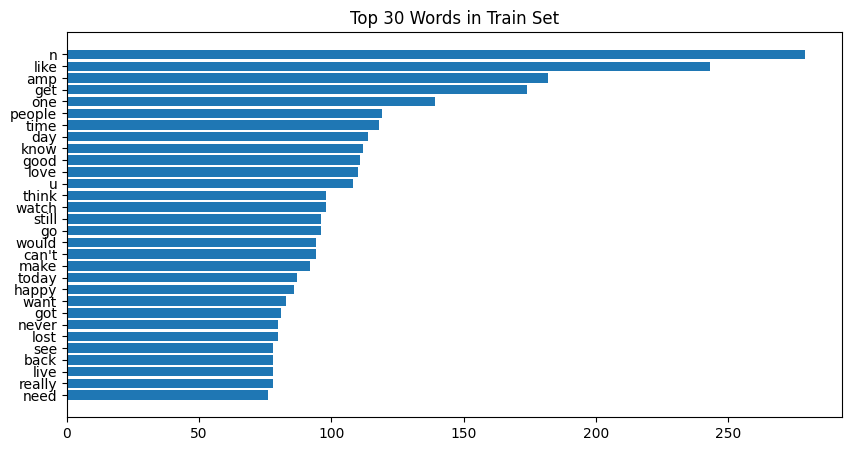

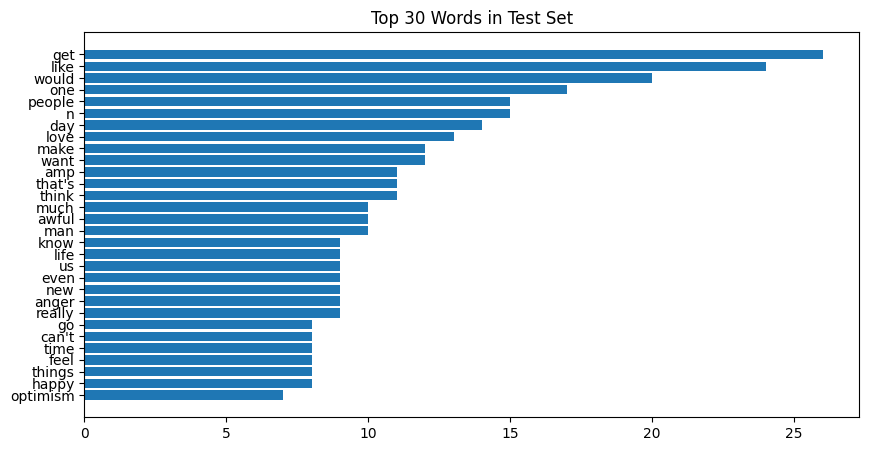

In [7]:
# Answer here
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))# remove stopword

def tokenize(text):
    text = text.lower()
    tokens = re.findall(r"\b[a-z']+\b", text)
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

from collections import Counter

train_words = []
for t in train_df['text']:
    train_words.extend(tokenize(t))

test_words = []
for t in test_df['text']:
    test_words.extend(tokenize(t))

train_freq = Counter(train_words)
test_freq = Counter(test_words)

top_train = train_freq.most_common(30)
top_test = test_freq.most_common(30)

import matplotlib.pyplot as plt

train_words, train_counts = zip(*top_train)
test_words, test_counts = zip(*top_test)

plt.figure(figsize=(10,5))
plt.barh(train_words[::-1], train_counts[::-1])
plt.title("Top 30 Words in Train Set")
plt.show()

plt.figure(figsize=(10,5))
plt.barh(test_words[::-1], test_counts[::-1])
plt.title("Top 30 Words in Test Set")
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl")
test_df.to_pickle("./data/test_df.pkl")

In [9]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


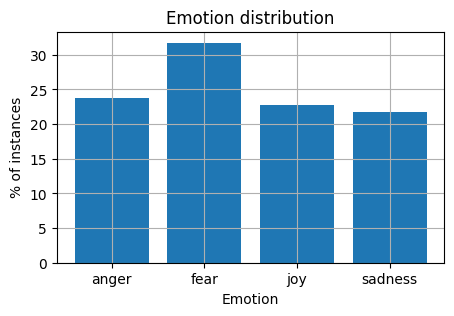

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [14]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [15]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [16]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [17]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [19]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [20]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [22]:
train_data_BOW_features_500.toarray()

array([[ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [23]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'class',
       'come', 'comes', 'could', 'country'], dtype=object)

In [24]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [25]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

#download NLTK tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')
#bulid TF-IDF vectorizer
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_vectorizer.fit(train_df['text'])

#trun text to TF-IDF
train_data_TFIDF = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF = TFIDF_vectorizer.transform(test_df['text'])


print(train_data_TFIDF.shape)   #(3613, 1000)
print(test_data_TFIDF.shape)    #(347, 1000)

feature_names = TFIDF_vectorizer.get_feature_names_out()
print(feature_names[100:110])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


(3613, 1000)
(347, 1000)
['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [27]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'fear', 'joy', 'fear', 'fear', 'sadness',
       'sadness', 'fear', 'joy'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [28]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.65


In [29]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.65      0.65        84
        fear       0.66      0.68      0.67       110
         joy       0.67      0.67      0.67        79
     sadness       0.62      0.58      0.60        74

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [30]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[55 17  7  5]
 [14 75  9 12]
 [ 8  9 53  9]
 [ 9 12 10 43]]


In [31]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

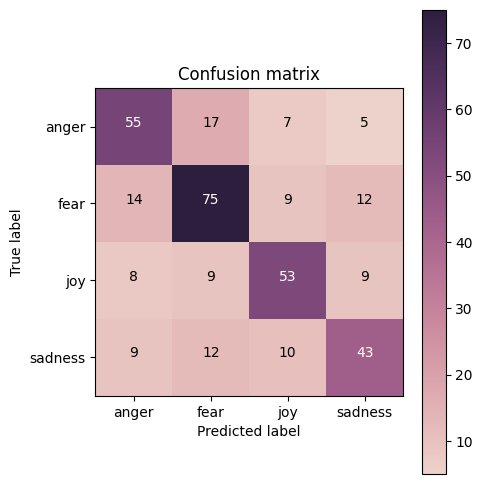

In [32]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

Answer here\
(1)
The training accuracy is nearly perfect (0.99), indicating that the model learned the training data very well.
However, the testing accuracy drops to 0.65, showing limited generalization ability,this suggests overfitting.
Decision Trees tend to memorize training data when the tree depth is not restricted, causing performance degradation on unseen test data.

(2)
The recall for sadness is the lowest (0.58), meaning that some sad sentences were misclassified into other emotions.
This may reflect that the sadness category has the smallest amount of data.

(3)
From the confusion matrix, the most common misclassifications are:
anger & fear (these emotions share similar negative tones or words),
fear ↔ sadness.
Overall, the model can roughly distinguish emotional tendencies, but semantic overlap among emotions still causes classification confusion.

(4)
The Bag-of-Words approach only counts word frequencies and ignores word order and semantic relationships
(e.g., word embeddings), which may be one of the reasons for misclassification.

In [33]:
# Answer here\
#(1)
#The training accuracy is nearly perfect (0.99), indicating that the model learned the training data very well.
#However, the testing accuracy drops to 0.65, showing limited generalization ability,this suggests overfitting.
#Decision Trees tend to memorize training data when the tree depth is not restricted, causing performance degradation on unseen test data.

#(2)
#The recall for sadness is the lowest (0.58), meaning that some sad sentences were misclassified into other emotions.
#This may reflect that the sadness category has the smallest amount of data.

#(3)
#From the confusion matrix, the most common misclassifications are:
#anger & fear (these emotions share similar negative tones or words),
#fear ↔ sadness.
#Overall, the model can roughly distinguish emotional tendencies, but semantic overlap among emotions still causes classification confusion.

#(4)
#The Bag-of-Words approach only counts word frequencies and ignores word order and semantic relationships
# (e.g., word embeddings), which may be one of the reasons for misclassification.

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training accuracy: 0.79
Testing accuracy:  0.70
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



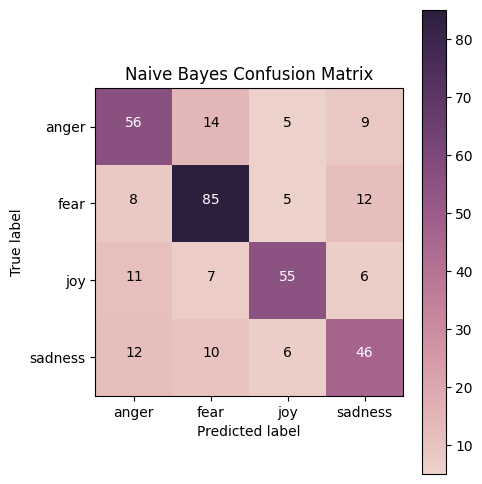

In [34]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#use BOW_500
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test  = BOW_500.transform(test_df['text'])
y_test  = test_df['emotion']

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred  = NB_model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test  = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {acc_train:.2f}")
print(f"Testing accuracy:  {acc_test:.2f}")

print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, classes=['anger','fear','joy','sadness'], title='Naive Bayes Confusion Matrix')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Answer here

(1)
The Naive Bayes model shows more balanced performance in precision, recall,
and F1-score across all four emotion classes, making its results more reliable.

(2)
Both models can accurately identify the fear category (since it has the largest number of samples
and the most consistent vocabulary), whereas the sadness category remains the lowest-performing one.

(3)
The Decision Tree confusion matrix shows more scattered misclassifications
especially between anger and fear — indicating that the model may have memorized noise
or specific words from the training data.

In contrast, the Naive Bayes confusion matrix shows a clearer diagonal pattern,
meaning that the predictions are more stable and the errors more concentrated,
which aligns with the conclusions above.

(4)
The Decision Tree is a non-parametric model capable of fitting highly complex decision boundaries.
Without proper regularization (e.g., limiting max_depth), it tends to memorize the training data,
leading to poor test performance.
On the other hand, Naive Bayes is a probabilistic and simple parametric model that
assumes conditional independence between features (words).
Although this assumption is a simplification, it actually works well for sparse data such as text.

In [35]:
# Answer here
#(1)
#The Naive Bayes model shows more balanced performance in precision, recall,
#and F1-score across all four emotion classes, making its results more reliable.

#(2)
#Both models can accurately identify the fear category (since it has the largest number of samples
#and the most consistent vocabulary), whereas the sadness category remains the lowest-performing one.

#(3)
#The Decision Tree confusion matrix shows more scattered misclassifications
#especially between anger and fear — indicating that the model may have memorized noise
#or specific words from the training data.

#In contrast, the Naive Bayes confusion matrix shows a clearer diagonal pattern,
#meaning that the predictions are more stable and the errors more concentrated,
#which aligns with the conclusions above.

#(4)
#The Decision Tree is a non-parametric model capable of fitting highly complex decision boundaries.
#Without proper regularization (e.g., limiting max_depth), it tends to memorize the training data,
#leading to poor test performance.
#On the other hand, Naive Bayes is a probabilistic and simple parametric model that
#assumes conditional independence between features (words).
#Although this assumption is a simplification, it actually works well for sparse data such as text.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic1.png?raw=1)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [36]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [37]:
import keras

In [38]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4095 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [39]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1335     fear
2721      joy
1275     fear
166     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [40]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [41]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic2.png?raw=1)

In [42]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [43]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/DM2025-Lab2-Exercise/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 43s 363ms/step - accuracy: 0.3213 - loss: 1.3628 - val_accuracy: 0.4380 - val_loss: 1.2759
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.6117 - loss: 1.0962 - val_accuracy: 0.6196 - val_loss: 0.9535
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.7694 - loss: 0.6466 - val_accuracy: 0.6830 - val_loss: 0.7927
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8531 - loss: 0.4155 - val_accuracy: 0.7003 - val_loss: 0.7968
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8918 - loss: 0.3129 - val_accuracy: 0.6974 - val_loss: 0.8278
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9108 - loss: 0.2624 - val_accuracy: 0.6715 - val_loss: 0.8847
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9335 - loss: 0.2137 - val_accuracy: 0.6945 - val_loss: 0.9442
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9439 - loss: 0.1802 - val

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [44]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step


array([[2.7342542e-04, 5.3312879e-06, 9.9971634e-01, 4.8584498e-06],
       [4.8549628e-06, 2.8192471e-10, 9.9999499e-01, 8.8524402e-08],
       [4.4995330e-10, 1.0000000e+00, 6.6452421e-09, 1.7769349e-08],
       [4.1333374e-02, 1.7497878e-06, 9.0860093e-01, 5.0063945e-02],
       [1.4878208e-07, 9.9999630e-01, 3.7636681e-07, 3.2634471e-06]],
      dtype=float32)

In [45]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'fear', 'joy', 'fear'], dtype=object)

In [46]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [47]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/DM2025-Lab2-Exercise/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368945,1.326660,0.438040,1.275883
1,1,0.648768,0.994370,0.619597,0.953519
2,2,0.784390,0.597878,0.682997,0.792679
3,3,0.844174,0.422660,0.700288,0.796798
4,4,0.876280,0.337493,0.697406,0.827752
5,5,0.905895,0.274313,0.671470,0.884710
6,6,0.925823,0.226155,0.694524,0.944171
7,7,0.935234,0.196020,0.694524,1.001045
8,8,0.949903,0.161295,0.680115,1.098043
9,9,0.958483,0.136538,0.682997,1.130854


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic3.png?raw=1)  ![pic4.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic4.png?raw=1)


Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')


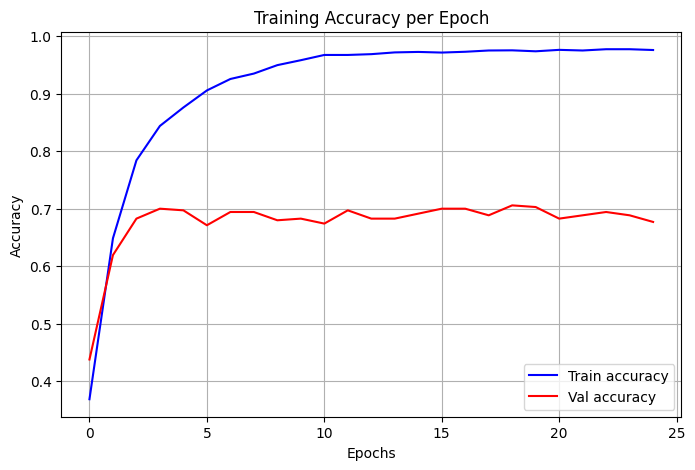

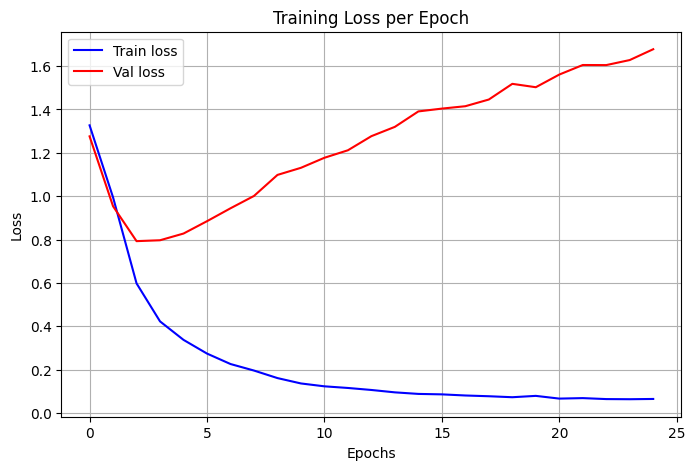

In [48]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

#load training log
log = pd.read_csv('/content/DM2025-Lab2-Exercise/logs/training_log.csv')
print(log.columns)

#Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(log['epoch'], log['accuracy'], label='Train accuracy', color='blue')
plt.plot(log['epoch'], log['val_accuracy'], label='Val accuracy', color='red')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Plot Loss
plt.figure(figsize=(8,5))
plt.plot(log['epoch'], log['loss'], label='Train loss', color='blue')
plt.plot(log['epoch'], log['val_loss'], label='Val loss', color='red')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#answer explanation

---

##EXPLANATION
**Figure 1: Training vs Validation Accuracy
The model learns very well on the training data but fails to maintain high performance on the validation data.
Validation accuracy increases at first but then plateaus around 0.7 and even slightly decreases.
This indicates that the model has memorized the training data rather than learning features that can generalize to unseen data.

→ This is a sign of Overfitting.

Figure 2: Training vs Validation Loss
After around 3–5 epochs, the validation loss starts to rise again, indicating that the model’s learning has begun to deviate from the optimal generalization point.
This suggests that the model is either too complex or has been trained for too long, leading it to overfit noise in the training set.

→ This is also a typical sign of Overfitting.**

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [49]:
## check library
!pip install gensim
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 53.3 MB/s eta 0:00:00


,id,text,text_tokenized
1335,20478,"#Trump is #afraid of the big, bad #Hillary. #e...","[#, Trump, is, #, afraid, of, the, big, ,, bad..."
2721,30717,@APkrawczynski Any possibly KG is being boug...,"[@, APkrawczynski, Any, possibly, KG, is, bein..."
1275,20418,@LmRyle @tomcolicchio @realDonaldTrump @Hillar...,"[@, LmRyle, @, tomcolicchio, @, realDonaldTrum..."
166,10166,@SkyUK what a joke!! Cut our internet off earl...,"[@, SkyUK, what, a, joke, !, !, Cut, our, inte..."
718,10718,"@ShieldsCap &lt; Steve between his feet, feeli...","[@, ShieldsCap, &, lt, ;, Steve, between, his,..."


In [50]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['#', 'Trump', 'is', '#', 'afraid', 'of', 'the', 'big', ',', 'bad', '#', 'Hillary', '.', '#', 'election', '#', 'PresidentialDebate', '#', 'PresidentialElection2016', '#', 'orangehitler', '#', 'skip', '#', 'hide', '#', 'coward', '#', 'fear']),
       list(['@', 'APkrawczynski', 'Any', 'possibly', 'KG', 'is', 'being', 'bought', 'out', 'as', 'a', 'player', 'so', 'that', 'he', 'can', 'buy', 'in', 'from', 'Glen', 'as', 'a', 'minority', 'owner', '?']),
       list(['@', 'LmRyle', '@', 'tomcolicchio', '@', 'realDonaldTrump', '@', 'HillaryClinton', '@', 'ajjaffe', 'I', 'understand', 'your', 'concerns', 'but', 'look', 'at', 'her', 'foundation', 'contributions', '#', 'worry'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [51]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [52]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.43656048,  0.34918833,  0.32275653, -0.09859952, -0.4779766 ,
       -0.9253362 ,  1.0542855 ,  1.3241897 , -0.5238552 , -0.58956903,
       -0.14845374, -0.8149496 , -0.55150104,  0.58854914, -0.03943472,
       -0.63779074,  0.01487905, -0.77789634, -0.11111116, -1.0076045 ,
        0.87258327,  0.38722184,  0.69565284,  0.04604325,  0.33127022,
        0.03965495, -0.7588606 ,  0.4487591 , -0.5786284 ,  0.6771621 ,
        0.43209678, -0.10569222,  0.40908024, -0.59035146,  0.19936638,
        0.7245126 ,  0.00421646, -0.3478651 , -0.42365178, -0.22172175,
       -0.38046023, -0.7220226 , -0.44299132,  0.0724598 ,  0.48096254,
       -0.08851396, -0.7323597 ,  0.46017227,  0.23802808,  0.71017337,
        0.16224107, -0.7442477 , -0.23027608, -0.10033356, -0.62780964,
        0.05704659,  0.1118728 , -0.15583806,  0.05718612,  0.21522596,
        0.19682741, -0.36930722,  0.79041696,  0.4234377 , -0.5938937 ,
        0.7620817 ,  0.2659777 ,  0.72943825, -1.1349082 ,  0.64

In [53]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9173966646194458),
 ('Be', 0.9148448705673218),
 ('smile', 0.9142614603042603),
 ('🕋', 0.9131930470466614),
 ('help', 0.9093115925788879),
 ('muslims', 0.903962254524231),
 ('Kik', 0.9014999270439148),
 ('bday', 0.8991074562072754),
 ("'you", 0.8985274434089661),
 ('HilltopBindery', 0.8969818353652954)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [54]:
!pip install gdown
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM -O GoogleNews-vectors-negative300.bin.gz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=471eed37-2571-4df2-b7ca-51188693f46b
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:27<00:00, 59.4MB/s]


In [55]:
import gzip, shutil

input_path = "/content/GoogleNews-vectors-negative300.bin.gz"
output_path = "/content/GoogleNews-vectors-negative300.bin"

with gzip.open(input_path, 'rb') as f_in:
    with open(output_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("✅ 解壓縮完成，檔案已存為：", output_path)

✅ 解壓縮完成，檔案已存為： /content/GoogleNews-vectors-negative300.bin


In [56]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "/content/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [57]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [58]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [59]:
# Answer here
import numpy as np

def sentence_vector(tokens, model):
    vectors = []
    for token in tokens:
        if token in model.key_to_index:
            vectors.append(model[token])
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

#trun a sentense to vector
train_df['sentence_vec'] = train_df['text_tokenized'].apply(lambda x: sentence_vector(x, glove_twitter_25_model))

print(train_df['sentence_vec'].iloc[0].shape)

(25,)


#answer explanation

##EXPLANATION
To utilize the word vectors for sentence-level modeling,
we can represent each sentence by aggregating the embeddings of the words it contains.
A simple and effective approach is to take the average of all word vectors within a sentence,
which produces a fixed-length vector representing the semantic meaning of the sentence.

This sentence-level embedding can then be used as input features for machine learning models such as Logistic Regression, SVM, or Deep Neural Networks.

More advanced approaches, such as using weighted averages (TF-IDF weighting) or sequence models (RNNs, LSTMs, Transformers),
can further capture word importance and contextual relationships between words.

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic5.png?raw=1)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [60]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [61]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic6.png?raw=1)

In [62]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [63]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic7.png?raw=1)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic9.png?raw=1)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [64]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

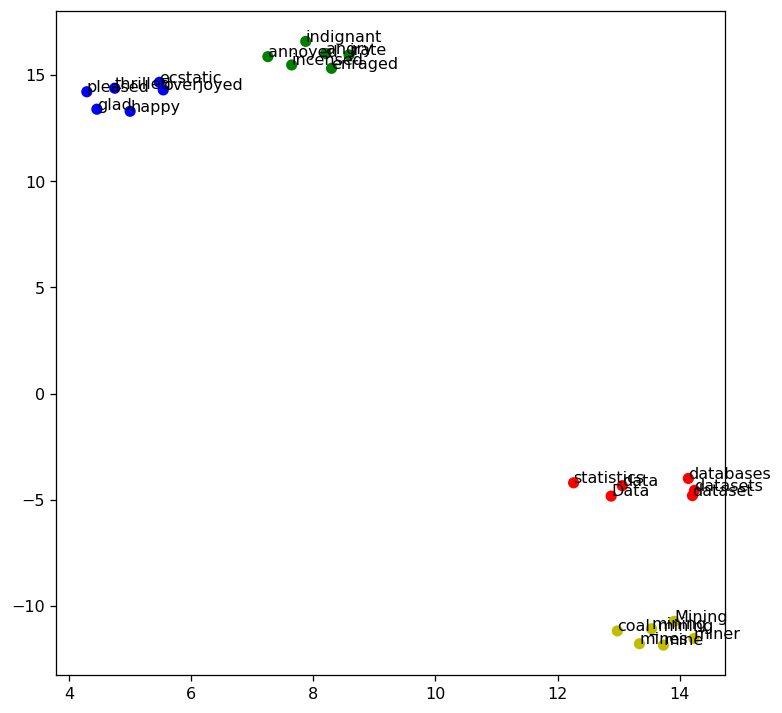

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

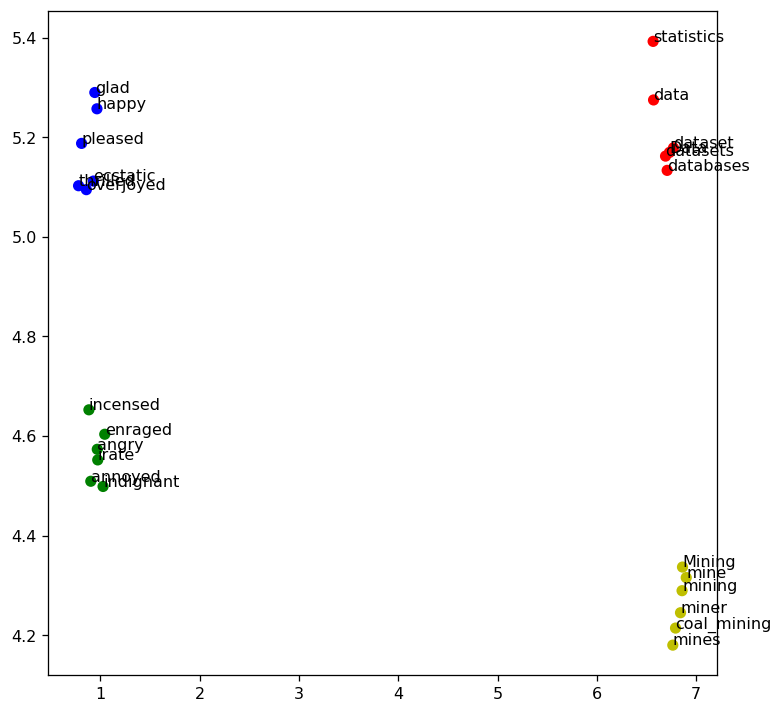

In [66]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [67]:
# Answer here
topn = 15
emotion_words = {
    'angry': ['angry'] + [w for w, _ in w2v_google_model.most_similar('angry', topn=topn)],
    'happy': ['happy'] + [w for w, _ in w2v_google_model.most_similar('happy', topn=topn)],
    'sad':   ['sad']   + [w for w, _ in w2v_google_model.most_similar('sad', topn=topn)],
    'fear':  ['fear']  + [w for w, _ in w2v_google_model.most_similar('fear', topn=topn)]
}

target_words = sum(emotion_words.values(), [])
print("Total words:", len(target_words))

Total words: 64


In [68]:
cn = topn + 1
colors = ['r'] * cn + ['g'] * cn + ['b'] * cn + ['y'] * cn

In [69]:
X_train = [w2v_google_model[w] for w in target_words]

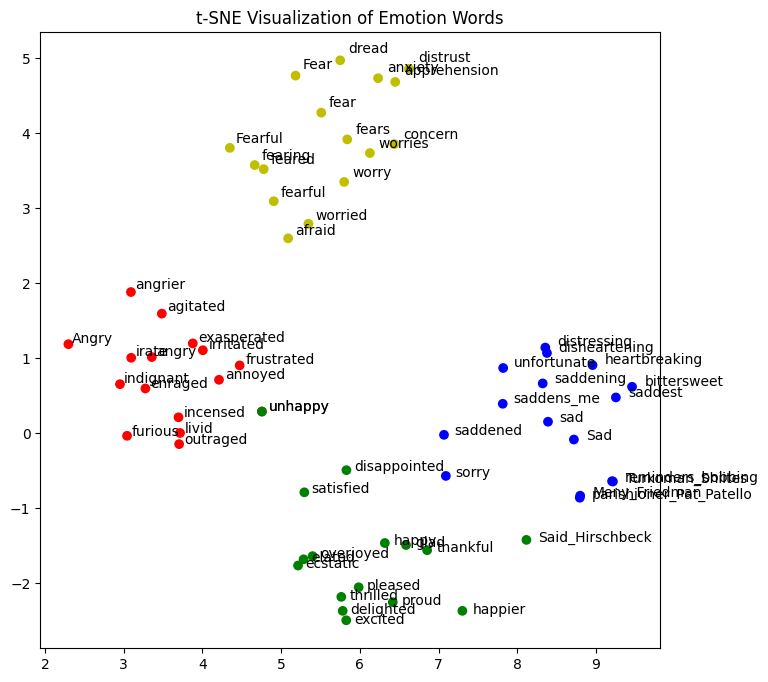

In [70]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

#trun list to numpy array
X_train = np.array([w2v_google_model[w] for w in target_words])

#run t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne.fit_transform(X_train)

#plot
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
for word, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(word, xy=(x, y), textcoords='offset points')
plt.title("t-SNE Visualization of Emotion Words")
plt.show()

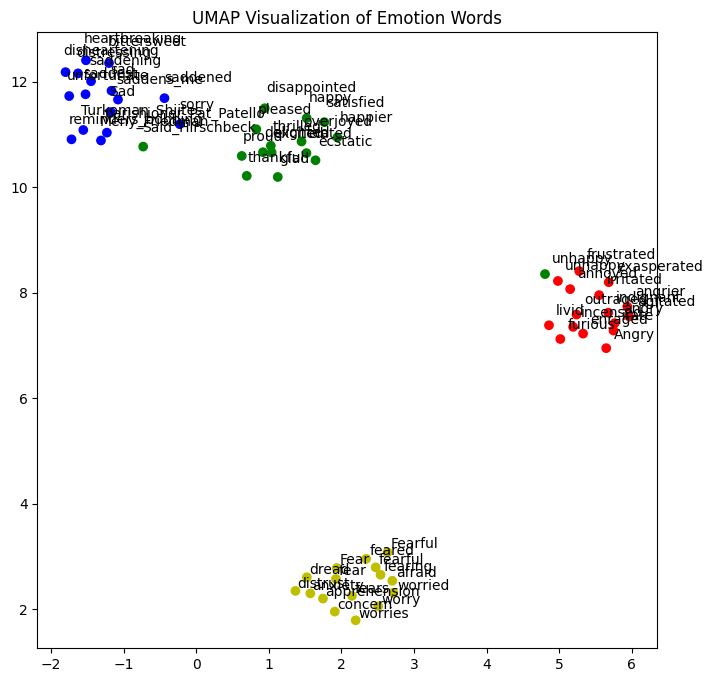

In [71]:
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt

X_train = np.array([w2v_google_model[w] for w in target_words])

#build UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)

X_umap = umap_model.fit_transform(X_train)

plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)
for word, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(word, xy=(x, y), textcoords='offset points')
plt.title("UMAP Visualization of Emotion Words")
plt.show()

---

#answer explanation

#t-SNE Result

t-SNE clearly separates the four emotional groups into compact local clusters.

Words with similar sentiment (e.g., angry, furious, irate) are placed very close together.

However, the distances between different emotion groups (e.g., angry vs fear) are not fully reliable because t-SNE focuses on preserving local structure.

The layout may change slightly each time due to its stochastic optimization nature.

#UMAP Result

UMAP also produces well-defined clusters but preserves a clearer global structure among the emotions.

The four categories (anger, joy, sadness, fear) are spread farther apart, showing more meaningful large-scale relationships.

#Interpretation

Both methods demonstrate that Word2Vec embeddings capture emotion semantics effectively, grouping synonyms and related affective words together.

t-SNE emphasizes local neighborhood relationships, while UMAP maintains both local and global structure.

In practical use, t-SNE is preferred for detailed visual inspection of tight clusters, whereas UMAP is better for discovering broader relationships and stable visualizations.